In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\think\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
### To see the current working directory
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\05. AI and DL IITR-15Mar2025(M)'

`os`: to use operating system related functions

- To know the `current working directory`: `os.getcwd()`

- To change the `change directory`: `os.chdir(path)`

In [3]:
# -------------------------------
# 1. Data Generation and Setup
# -------------------------------

In [4]:
def generate_data(n_samples = 100, noise=0.1, seed=42):
    """
    Generate dummy linear data: y = 4 + 3*X + noise.
    """
    np.random.seed(seed)
    X = 2 * np.random.rand(n_samples, 1) #generates random numbers in a given shape
    y = 4 + 3*X + noise * np.random.randn(n_samples, 1)
    return X, y

In [5]:
## Generated data
X, y = generate_data(n_samples=100, noise=0.7)

In [6]:
X.ndim

2

In [7]:
X.shape

(100, 1)

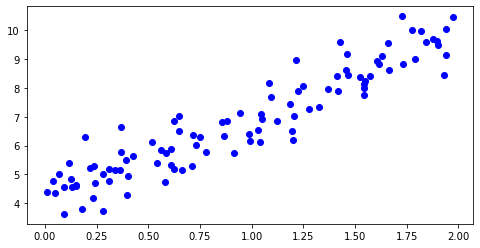

In [8]:
### let us plot the data distribution - WITHOUT NOISE
plt.figure(figsize = (8,4))
plt.scatter(X, y, color = 'blue', label='Generated Data with Noise')
plt.show()

In [9]:
def generate_data_test(n_samples = 100, noise=0.1, seed=42):
    """
    Generate dummy linear data: y = 4 + 3*X + noise.
    """
    np.random.seed(seed)
    X = 2 * np.random.rand(n_samples, 1) #generates random numbers in a given shape
    y = 4 + 3*X 
    return X, y

In [10]:
## Generated data
X_test, y_test = generate_data_test(n_samples=100, noise=0.2)

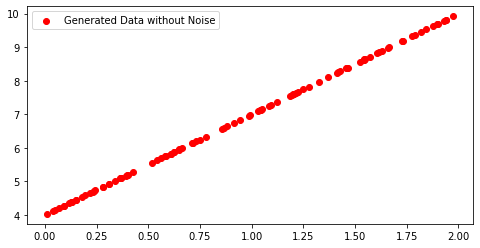

In [11]:
### let us plot the data distribution - WITHOUT NOISE
plt.figure(figsize = (8,4))
plt.scatter(X_test, y_test, color = 'red', label='Generated Data without Noise')
plt.legend()
plt.show()

In [12]:
# Number of rows in data
m = len(y)

### Let us add the bias term
X_b = np.c_[np.ones((m,1)), X]  # adding a bias term which is fixed value 1 to the existing X

In [13]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

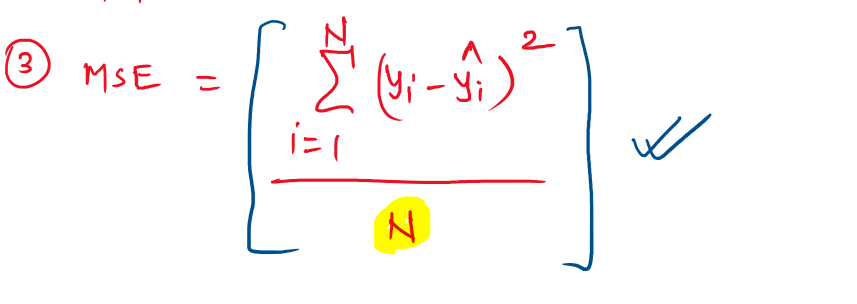

In [14]:
### Define the cost function
def compute_cost(X,y, theta):
    """
    Compute the Mean Squared Error Cost Function
    """
    m = len(y)
    return np.sum((X.dot(theta) - y) ** 2)/(2*m) # in denominator there is an extra 2

### BATCH GRADIENT DESCENT FUNCTION

In [15]:
def bgd(X,y,theta, learning_rate = 0.1, epochs = 1000):
    
    """
    Vanilla Gradient Descent using the entire dataset
    Returns the final theta and a history of the cost function
    X = Array of X with added bias
    y = Vector of y
    theta: vector of weight parameter randomly assigned
    learning_rate: default to 0.1
    epochs: number of times model will run through the entire training dataset
    
    """
    m = len(y)
    cost_history = np.zeros(epochs) # zero-array to store the cost after each update
    theta_history = np.zeros((epochs, theta.shape[0])) #zero-array to store the parameter (weights & biases) values
    
    
    for epoch in range(epochs):
        
        gradients = (X.T.dot(X.dot(theta) - y))/m
        theta = theta - learning_rate * gradients
        cost = compute_cost(X,y, theta)
        
        #Update the empty arrays for theta and cost_history
        cost_history[epoch] = cost #uni-dimension
        theta_history[epoch, :]=theta.T # 2 dimensions
        
    return theta, cost_history, theta_history

### Running the algorithm


In [16]:
### Initialize the parameters 
np.random.seed(0)
### Initialize the theta
theta = np.random.randn(2,1)
print(theta)

[[1.76405235]
 [0.40015721]]


In [17]:
theta_bgd, cost_history_bgd, theta_history_bgd = bgd(X_b, y, theta,  learning_rate = 0.1, epochs=30)

In [18]:
cost_history_bgd

array([7.75001556, 4.95373459, 3.19306184, 2.08444818, 1.38639656,
       0.94685122, 0.6700721 , 0.49577758, 0.38601205, 0.31687719,
       0.2733257 , 0.24588318, 0.22858419, 0.21767263, 0.21078349,
       0.20642765, 0.20366748, 0.2019126 , 0.20079125, 0.20006936,
       0.19959952, 0.19928888, 0.19907899, 0.19893301, 0.19882774,
       0.19874855, 0.19868622, 0.19863492, 0.19859097, 0.19855204])

In [19]:
theta_history_bgd

array([[2.23205069, 0.92571924],
       [2.60382737, 1.3423793 ],
       [2.89924527, 1.67263224],
       [3.13406567, 1.93432758],
       [3.32079521, 2.14162876],
       [3.46935799, 2.30577432],
       [3.58762888, 2.4356819 ],
       [3.68185666, 2.53842754],
       [3.75699987, 2.61962596],
       [3.81699317, 2.6837323 ],
       [3.86495882, 2.73428165],
       [3.90337444, 2.77407896],
       [3.93420612, 2.80534988],
       [3.95901403, 2.82986037],
       [3.97903628, 2.84901161],
       [3.99525539, 2.86391535],
       [4.0084511 , 2.87545369],
       [4.01924222, 2.88432647],
       [4.02811987, 2.89108894],
       [4.03547383, 2.8961816 ],
       [4.04161351, 2.89995391],
       [4.04678448, 2.90268308],
       [4.05118172, 2.90458902],
       [4.05496   , 2.90584612],
       [4.05824224, 2.90659271],
       [4.06112606, 2.90693847],
       [4.06368897, 2.90697035],
       [4.0659926 , 2.90675728],
       [4.0680859 , 2.9063539 ],
       [4.0700078 , 2.90580348]])

In [20]:
print('BGD Theta 0: {:0.3f}, \nBGD Theta 1: {:0.3f}'.format(theta_bgd[0][0], theta_bgd[1][0]))
print('BGD Final Cost Value: {:0.3f}'.format(cost_history_bgd[-1]))

BGD Theta 0: 4.070, 
BGD Theta 1: 2.906
BGD Final Cost Value: 0.199


Text(0.5, 0.5, 'Final Cost: 0.199\nTheta0: 4.070\nTheta1: 2.906')

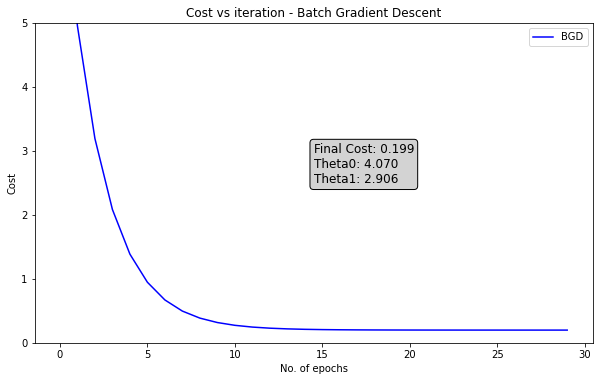

In [21]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(10,20)) #canvas ready

# Plot for BGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_bgd)), cost_history_bgd, label='BGD', color='blue')
plt.title('Cost vs iteration - Batch Gradient Descent')
plt.xlabel('No. of epochs')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_bgd[-1]:.3f}\nTheta0: {theta_bgd[0][0]:.3f}\nTheta1: {theta_bgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)


In [22]:
### GPT code - Review later

import numpy as np

# Create a small sample dataset
X_sample = np.array([[1, 2],
                     [1, 4],
                     [1, 6]])  # Includes bias term as the first column (1s)

theta_sample = np.array([[0.5],
                         [2.0]])  # theta = [bias, weight]

# Perform the dot product
predictions = X_sample.dot(theta_sample)

X_sample, theta_sample, predictions


(array([[1, 2],
        [1, 4],
        [1, 6]]),
 array([[0.5],
        [2. ]]),
 array([[ 4.5],
        [ 8.5],
        [12.5]]))

In [23]:
X_sample

array([[1, 2],
       [1, 4],
       [1, 6]])

In [24]:
theta_sample

array([[0.5],
       [2. ]])

In [25]:
predictions

array([[ 4.5],
       [ 8.5],
       [12.5]])

### Let us plot the best fit line

### Visualization

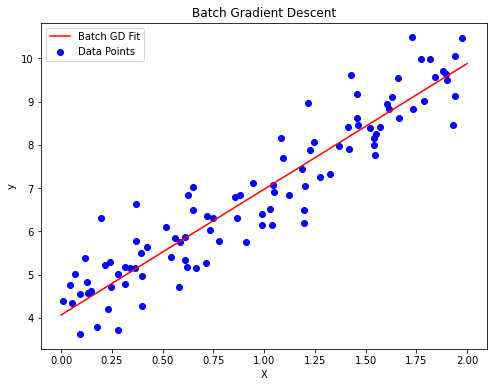

In [66]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(8,6))

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='red', label='Batch GD Fit')
plt.title("Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## MINI-BATCH GRADIENT DESCENT (MBGD) DEMONSTRATION

In [67]:
indices = np.random.permutation(m)
indices

array([25, 77, 54, 43, 93, 30, 85,  8, 27, 28, 17, 95, 65, 73, 62,  4, 41,
       26, 66, 60, 48, 82, 89, 10, 38, 79, 71, 12, 75, 49, 72, 64, 61, 44,
        7, 29, 88, 74, 34, 35,  9, 37, 32, 83, 18, 13, 51, 84, 63, 56, 22,
       94,  6, 45, 15, 70, 68, 11,  2, 24, 47, 52, 36, 96, 76, 21, 16, 23,
       19, 98, 59, 67, 90,  0, 99, 97, 31, 20, 81, 50, 40, 14, 33,  3, 80,
       69, 39, 53, 55, 87,  1, 86, 57, 58,  5, 78, 42, 92, 46, 91])

In [68]:
def mbgd(X,y,theta, learning_rate = 0.1, epochs = 100, batch_size =32):
    
    """
    Min-Batch Gradient Descent using the entire dataset
    Returns the final theta and a history of the cost function
    X = Array of X with added bias
    y = Vector of y
    theta: vector of weight parameter randomly assigned
    learning_rate: default to 0.1
    epochs: number of times model will run through the entire training dataset
    batch_size: default batch size is 32 which means that in a mini batch there are 32 samples by default
    
    """
    m = len(y) #no. of rows
    n_batches = int(np.ceil(m/batch_size)) # number of batches
    total_updates = epochs * n_batches ### total number of updates
    
    ## Empty Arrays to store the output
    cost_history = np.zeros(total_updates) # zero-array to store the cost after each update
    theta_history = np.zeros((total_updates, theta.shape[0])) #zero-array to store the parameter (weights & biases) values
    
    iter_num = 0 ### to index cost_history and theta_history
    
    for epoch in range(epochs):
        
        ## Shuffle the data at the beginning of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i: i+batch_size]
#             print(len(X_batch))
            y_batch = y_shuffled[i: i+batch_size]
            
            ### Calculate the gradients
            gradients = (X_batch.T.dot(X_batch.dot(theta) - y_batch))/len(y_batch)
            theta = theta - learning_rate * gradients
        
            ### Optionally record cost and theta after each mini-batch update
            cost = compute_cost(X,y, theta)
            #Update the empty arrays for theta and cost_history
            cost_history[iter_num] = cost #uni-dimension
            theta_history[iter_num, :]=theta.T # 2 dimensions 
            iter_num +=1
        
    return theta, cost_history, theta_history          

In [69]:
theta_mbgd, cost_history_mbgd, theta_history_mbgd = mbgd(X_b, y, theta,  learning_rate = 0.1, epochs=100, batch_size=32)

In [70]:
print('MBGD Theta 0: {:0.3f}, \nBGD Theta 1: {:0.3f}'.format(theta_mbgd[0][0], theta_mbgd[1][0]))
print('MBGD Final Cost Value: {:0.3f}'.format(cost_history_mbgd[-1]))

MBGD Theta 0: 4.139, 
BGD Theta 1: 2.819
MBGD Final Cost Value: 0.198


In [71]:
len(cost_history_mbgd)

400

In [72]:
cost_history_mbgd

array([7.14574824, 4.98817532, 3.2282768 , 1.81162601, 1.25914298,
       0.86950132, 0.61537652, 0.40773181, 0.32975746, 0.28439907,
       0.25138521, 0.23466497, 0.22403536, 0.21086432, 0.20731504,
       0.21147977, 0.20393337, 0.20302156, 0.20233934, 0.21339648,
       0.203321  , 0.20517389, 0.20390252, 0.20201034, 0.19922017,
       0.19928607, 0.20105615, 0.1993492 , 0.19916657, 0.19957782,
       0.19894631, 0.1995457 , 0.19969242, 0.19961907, 0.19886584,
       0.20030616, 0.20013608, 0.20069355, 0.198672  , 0.20004004,
       0.19917471, 0.19994914, 0.19921744, 0.19911911, 0.19913296,
       0.19897708, 0.19886521, 0.19908084, 0.19910901, 0.19888363,
       0.19902583, 0.19931622, 0.19966365, 0.19864398, 0.19890109,
       0.19999986, 0.20087685, 0.19947438, 0.19896259, 0.20147744,
       0.20465556, 0.20025706, 0.19865368, 0.19860824, 0.19907805,
       0.19854993, 0.19828268, 0.20290521, 0.19908809, 0.19992082,
       0.1995278 , 0.20041812, 0.20054376, 0.20005729, 0.19853

In [73]:
len(theta_history_mbgd)

400

In [74]:
theta_history_mbgd

array([[2.26937706, 1.0405276 ],
       [2.58836767, 1.34580303],
       [2.88843301, 1.66891768],
       [3.17849441, 2.03113235],
       [3.34339348, 2.20094758],
       [3.48634508, 2.35151917],
       [3.59543292, 2.48350417],
       [3.72657028, 2.61516296],
       [3.78899127, 2.68550924],
       [3.83713626, 2.73428609],
       [3.88237618, 2.77769028],
       [3.90816311, 2.8080336 ],
       [3.92894106, 2.83036496],
       [3.96587619, 2.86302158],
       [3.97960572, 2.87443387],
       [3.95605758, 2.86989677],
       [3.99117224, 2.89416348],
       [3.99965648, 2.89463801],
       [3.99938483, 2.90521535],
       [3.95593594, 2.85747189],
       [3.99526466, 2.89651968],
       [3.98887045, 2.883255  ],
       [3.9947633 , 2.88986191],
       [4.01001182, 2.89532089],
       [4.0464488 , 2.92890686],
       [4.04500146, 2.93163877],
       [4.02079877, 2.89660874],
       [4.04121196, 2.91442919],
       [4.0461204 , 2.92151616],
       [4.03812014, 2.90811596],
       [4.

In [75]:
len(theta_history_mbgd)

400

### Let us plot the cost function vs updates

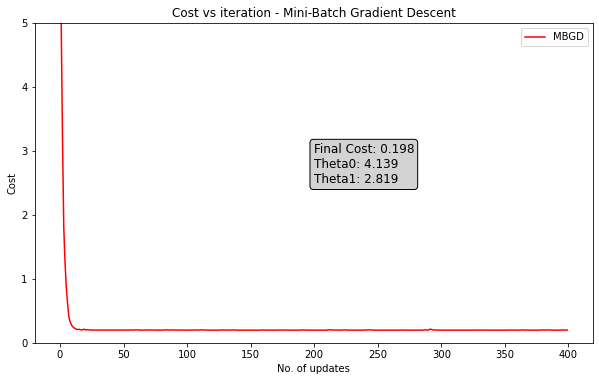

In [76]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(10,20)) #canvas ready

# Plot for MBGD
plt.subplot(3,1,1)
plt.plot(range(len(cost_history_mbgd)), cost_history_mbgd, label='MBGD', color='red')
plt.title('Cost vs iteration - Mini-Batch Gradient Descent')
plt.xlabel('No. of updates')
plt.ylabel('Cost')
plt.ylim(0,5)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_mbgd[-1]:.3f}\nTheta0: {theta_mbgd[0][0]:.3f}\nTheta1: {theta_mbgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.show()


### Visualization

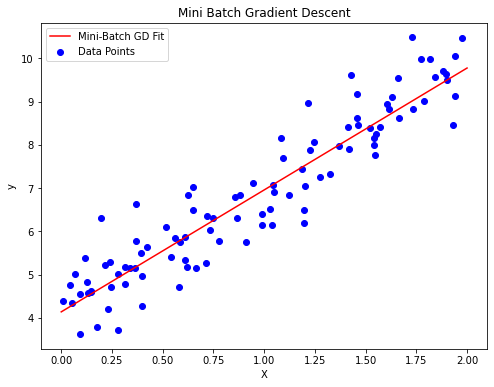

In [77]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_mbgd), color='red', label='Mini-Batch GD Fit')
plt.title("Mini Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## STOCHASTIC GRADIENT DESCENT (SGD) DEMONSTRATION

In [91]:
def sgd(X,y,theta, learning_rate = 0.1, epochs = 100):
    
    """
    Stochastic Gradient Descent using the entire dataset
    Returns the final theta and a history of the cost function
    X = Array of X with added bias
    y = Vector of y
    theta: vector of weight parameter randomly assigned
    learning_rate: default to 0.1
    epochs: number of times model will run through the entire training dataset
    
    """
    m = len(y)
    cost_history = np.zeros(epochs * m) # zero-array to store the cost after each update
    theta_history = np.zeros((epochs * m , theta.shape[0])) #zero-array to store the parameter (weights & biases) values
    
    
    for epoch in range(epochs): # loop over number of epochs
        
        for i in range(m): #loop over each training row per epoch
            
            ### Randomly select a training row/training example
            rand_index = np.random.randint(0,m)
            X_i = X[rand_index, :].reshape(1, X.shape[1])
            y_i = y[rand_index, :].reshape(1,1)
            
            ### Compute the gradient for each row and update the theta
            gradients = X_i.T.dot(X_i.dot(theta) - y_i)
            theta = theta - learning_rate * gradients
            cost = compute_cost(X,y, theta)

            #Update the empty arrays for theta and cost_history
            cost_history[epoch*m + i] = cost #uni-dimension
            theta_history[epoch*m + i, :]=theta.T # 2 dimensions

    return theta, cost_history, theta_history

### Running the `SGD` algorithm

In [92]:
theta_sgd, cost_history_sgd, theta_history_sgd = sgd(X_b, y, theta,  learning_rate = 0.1, epochs=100)

In [93]:
print('SGD Theta 0: {:0.3f}, \nBGD Theta 1: {:0.3f}'.format(theta_sgd[0][0], theta_sgd[1][0]))
print('MBGD Final Cost Value: {:0.3f}'.format(cost_history_sgd[-1]))

SGD Theta 0: 3.980, 
BGD Theta 1: 2.713
MBGD Final Cost Value: 0.242


In [98]:
print('Total number of total updates for the cost is:', len(cost_history_sgd))

Total number of total updates for the cost is: 10000


In [95]:
cost_history_sgd

array([10.8096283 ,  7.35466828,  3.64190312, ...,  0.23813188,
        0.2876264 ,  0.24225407])

### Let us plot the cost function vs updates - `SGD`

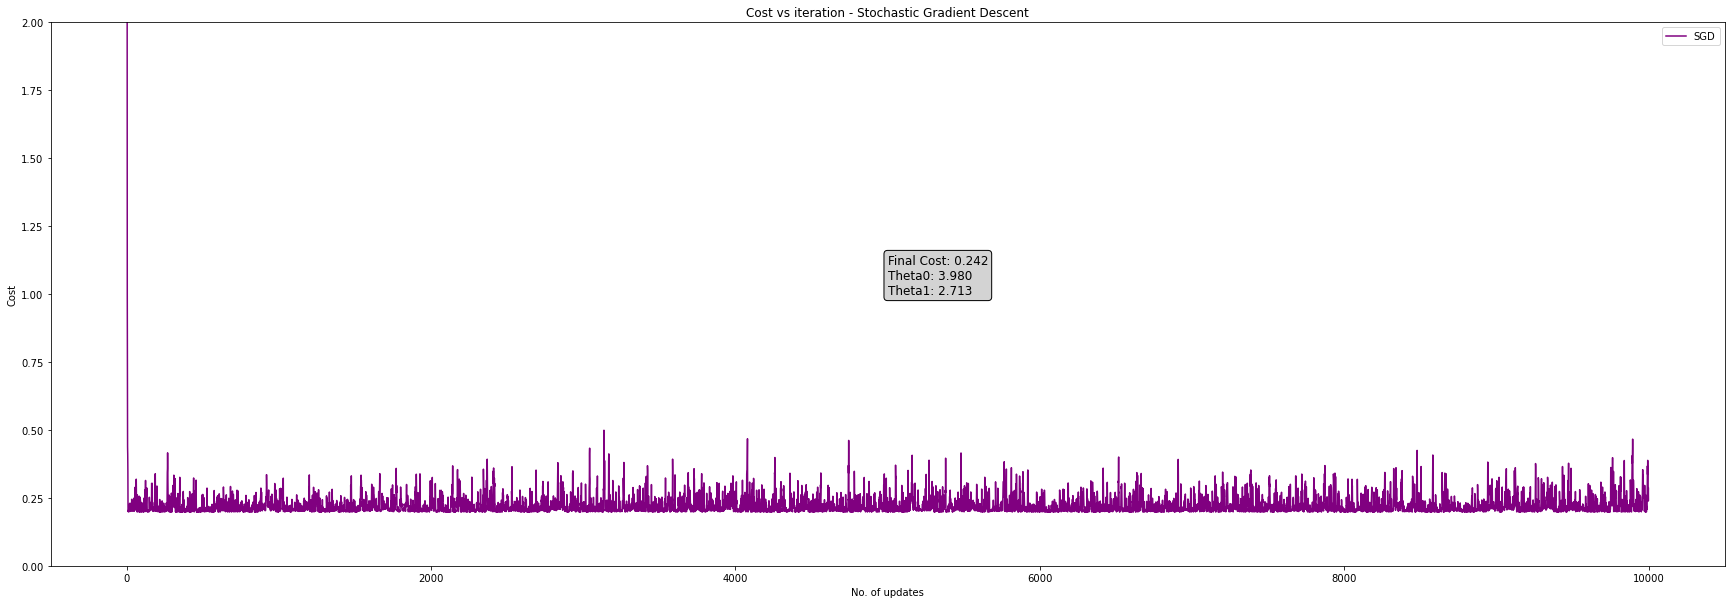

In [108]:
# Plotting cost history in separate subplots under the same chart
plt.figure(figsize=(30,10)) #canvas ready
plt.plot(range(len(cost_history_sgd)), cost_history_sgd, label='SGD', color='purple')
plt.title('Cost vs iteration - Stochastic Gradient Descent')
plt.xlabel('No. of updates')
plt.ylabel('Cost')
plt.ylim(0,2)
# plt.xlim(100,2000)
plt.legend()
plt.annotate(f'Final Cost: {cost_history_sgd[-1]:.3f}\nTheta0: {theta_sgd[0][0]:.3f}\nTheta1: {theta_sgd[1][0]:.3f}',
             xy=(0.5, 0.5), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgray'), fontsize=12)

plt.show()


### Visualization

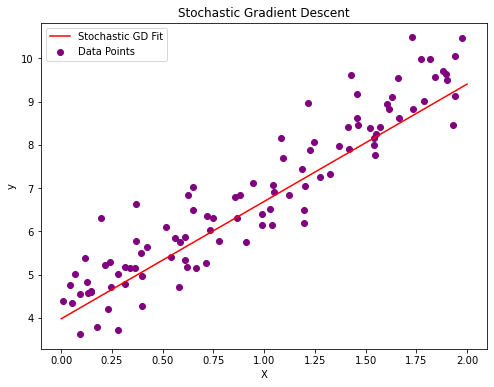

In [109]:
# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='purple', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_sgd), color='red', label='Stochastic GD Fit')
plt.title("Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

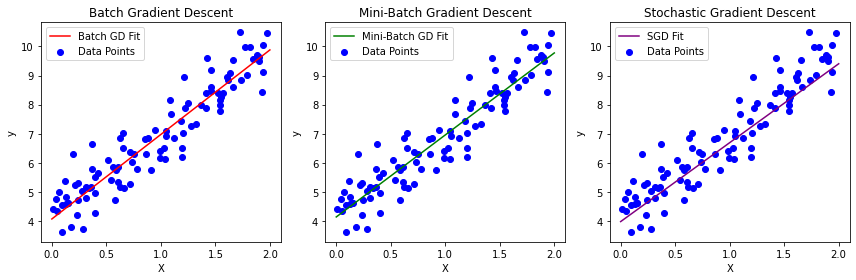

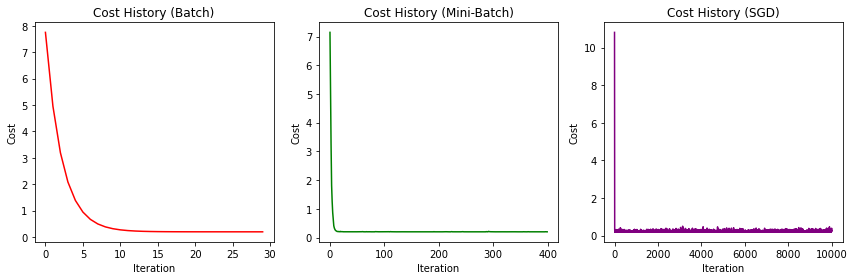

In [111]:
# -------------------------------
# 4. Visualization
# -------------------------------

# Create a range of values for plotting the best fit line
x_plot = np.linspace(0, 2, 100).reshape(100, 1)
x_plot_b = np.c_[np.ones((100, 1)), x_plot]

# Plot best-fit lines for each algorithm
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_bgd), color='red', label='Batch GD Fit')
plt.title("Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_mbgd), color='green', label='Mini-Batch GD Fit')
plt.title("Mini-Batch Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_plot, x_plot_b.dot(theta_sgd), color='purple', label='SGD Fit')
plt.title("Stochastic Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

# Plot cost history curves for each algorithm to compare convergence
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(cost_history_bgd, color='red')
plt.title("Cost History (Batch)")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.subplot(1, 3, 2)
plt.plot(cost_history_mbgd, color='green')
plt.title("Cost History (Mini-Batch)")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.subplot(1, 3, 3)
plt.plot(cost_history_sgd, color='purple')
plt.title("Cost History (SGD)")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.tight_layout()
plt.show()
